In [1]:
import pandas as pd 
dados = pd.read_csv('fraud_dataset_example.csv')


In [2]:
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn import metrics

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

In [8]:
from imblearn.over_sampling import SMOTE


In [9]:
import numpy as np

In [10]:
import seaborn as sns


In [11]:
dados.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [12]:
dados.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
dados = dados[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', ]]

dados.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [14]:
colunas = {
    'isFraud':'fraude',
    'isFlaggedFraud':'possivel_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2'
}

In [15]:
dados = dados.rename(columns=colunas)

In [16]:
dados = dados.rename(columns = {'possivel_fraude':'super_fraude'})

In [17]:
dados

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00
101609,0,0,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97
101610,0,0,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00
101611,0,0,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43


In [18]:
dados.groupby(by = 'fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [19]:
dados.groupby(by ='super_fraude').tempo.count()

super_fraude
0    101613
Name: tempo, dtype: int64

In [20]:
# Aplicando Encoding

dados = pd.get_dummies(data = dados, columns = ['tipo'])
dados.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False,False,True,False
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False,False,True,False
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,False,False,False,False,True
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,False,True,False,False,False
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False,False,True,False


In [21]:
dados = dados.drop(['super_fraude','cliente1','cliente2'],axis=1)
dados.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,False,True,False
2,1,1,181.00,181.0,0.00,0.0,0.0,False,False,False,False,True
3,1,1,181.00,181.0,0.00,21182.0,0.0,False,True,False,False,False
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False


In [22]:
X = dados.drop('fraude',axis=1)
y = dados['fraude']

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [23]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
print('Precisão:',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))
print('F1',metrics.f1_score(y_test,y_pred))


Acurácia: 0.9989765391276965
Precisão: 0.2
Recall 0.043478260869565216
F1 0.07142857142857142


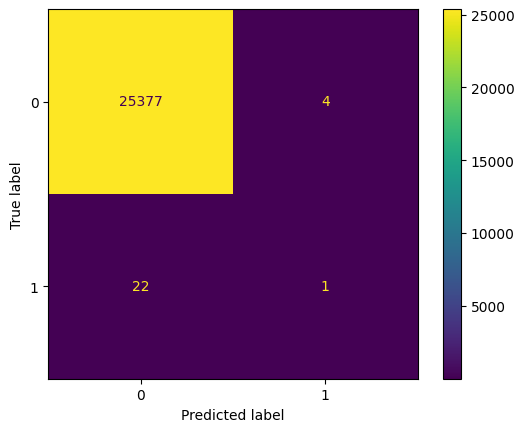

In [24]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

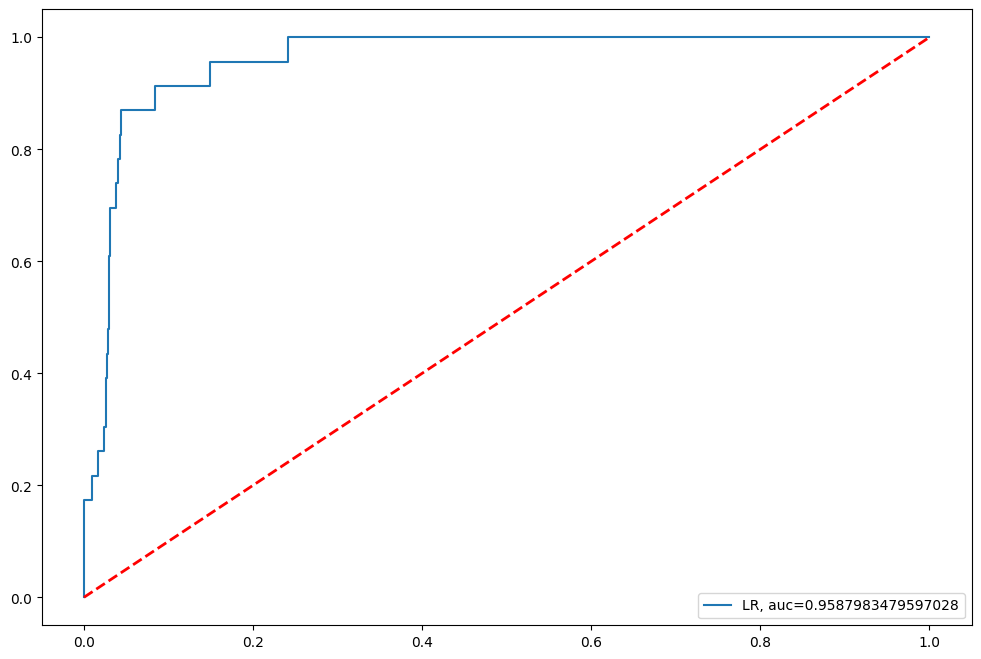

In [25]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)



In [26]:
smote = SMOTE(random_state=SEED)


In [27]:
X_resampled, y_resampled = smote.fit_resample(X,y)

In [28]:
dados_balanceados = pd.concat([y_resampled,X_resampled],axis=1)
dados_balanceados

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,False,False,False,True,False
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,False,False,False,True,False
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,False,False,False,False,True
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,False,True,False,False,False
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,False,False,False,False,True
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,False,False,False,False,True
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,False,True,False,False,True
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,False,False,False,False,True


In [29]:
dados_balanceados.groupby('fraude')['tempo'].count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [30]:
X = dados_balanceados.iloc[:, 1:].values
y = dados_balanceados.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [31]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
print('Precisão:',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))
print('F1',metrics.f1_score(y_test,y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall 0.9623125493291239
F1 0.9428709521507975


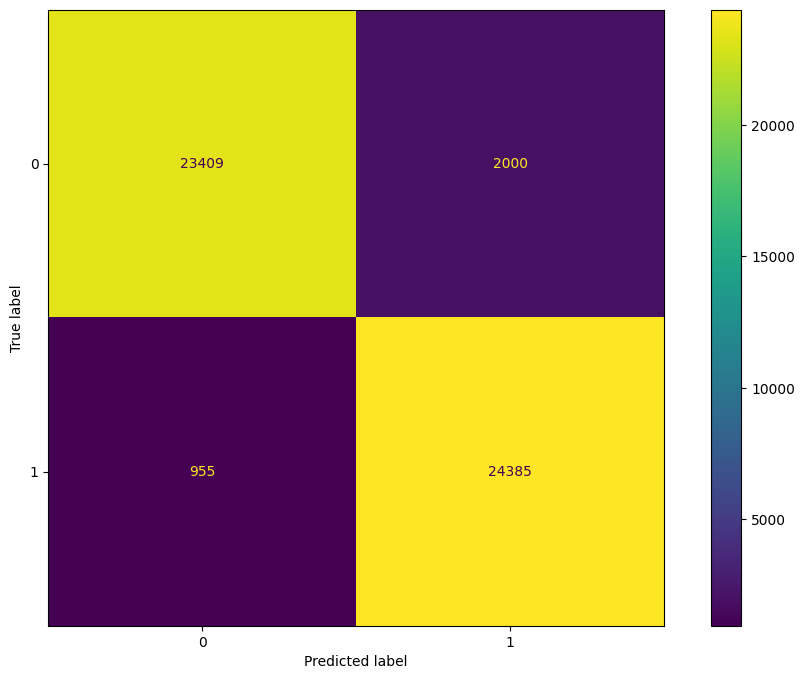

In [32]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

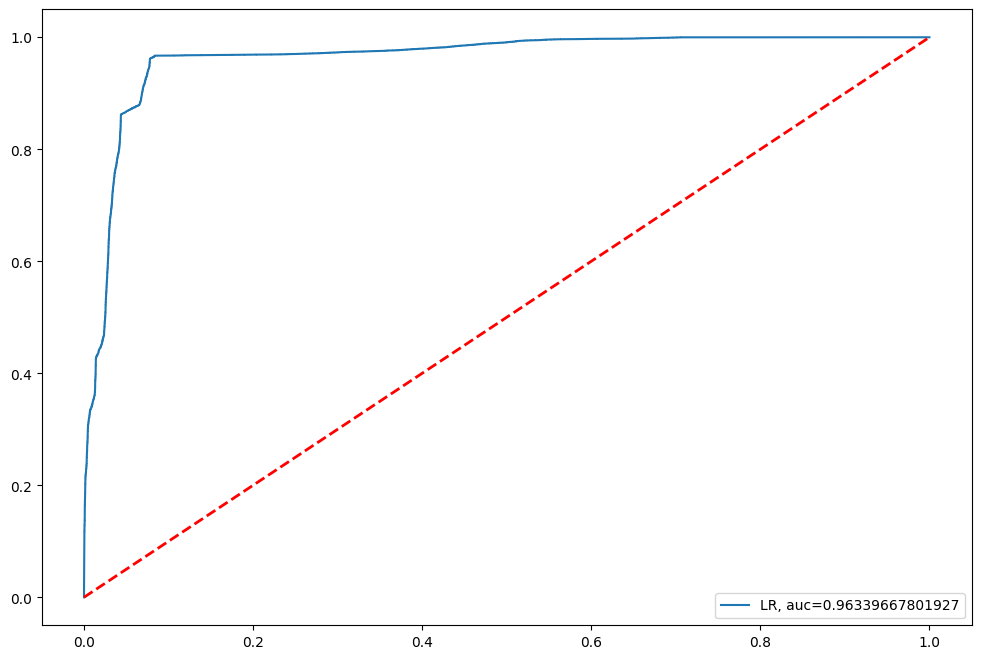

In [33]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [34]:
# Hipóteses

# tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

# cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

# O cliente paga as suas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude.



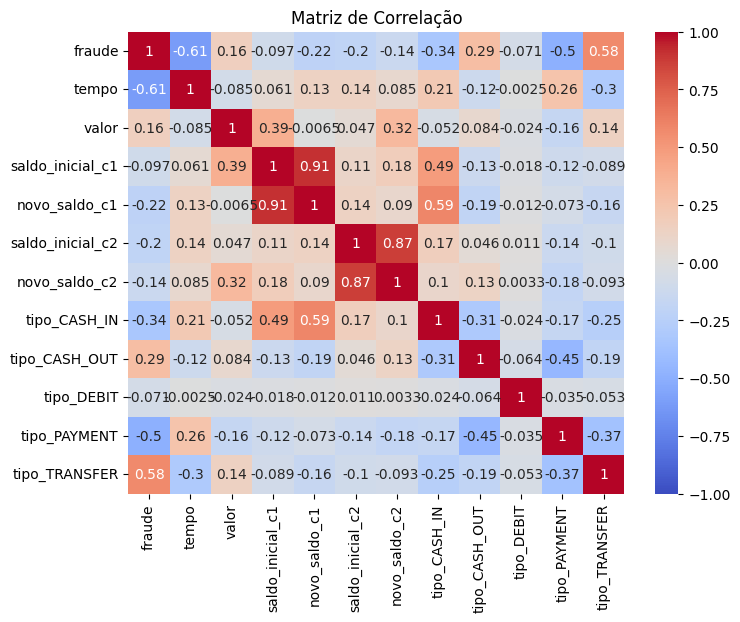

In [35]:
correlation_matrix = dados_balanceados.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [38]:
model = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
print('Precisão:',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))
print('F1',metrics.f1_score(y_test,y_pred))

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall 0.9839779005524862
F1 0.9604221635883906


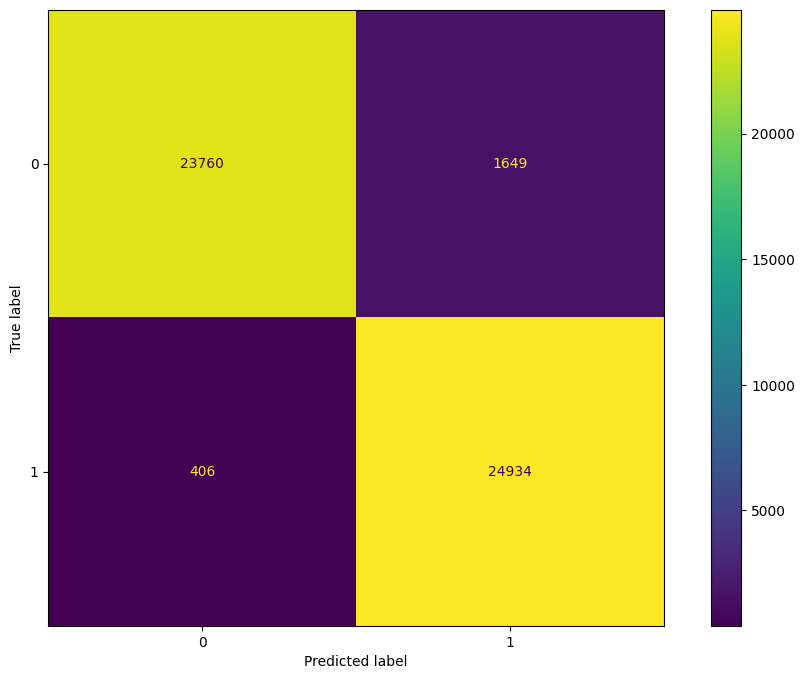

In [39]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

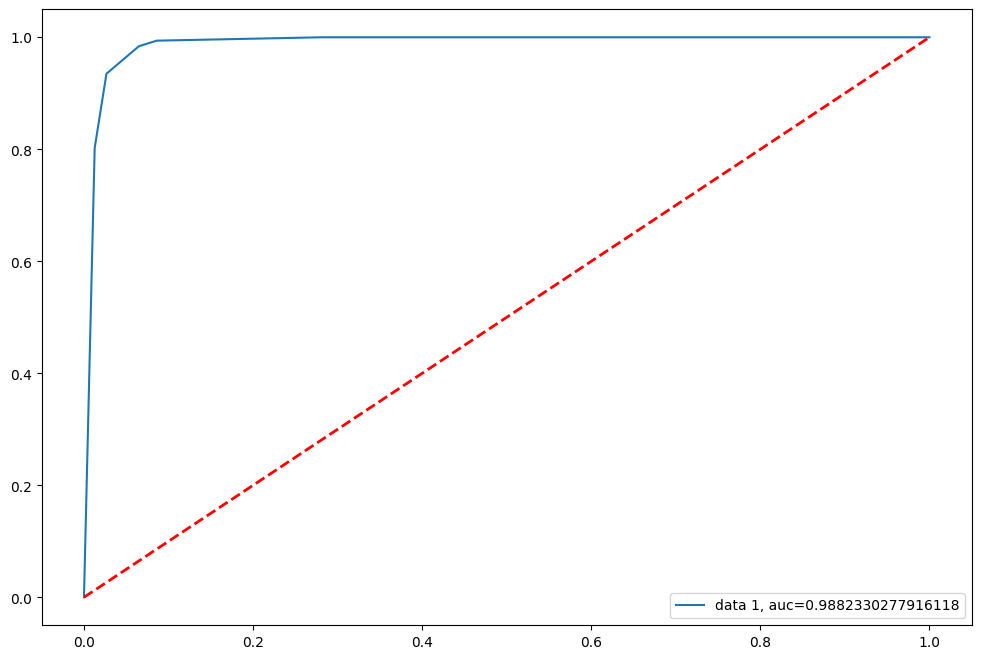

In [43]:
y_pred_proba = dt.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED)

In [46]:
model = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
print('Precisão:',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))
print('F1',metrics.f1_score(y_test,y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall 0.9655090765588004
F1 0.9720688148118718


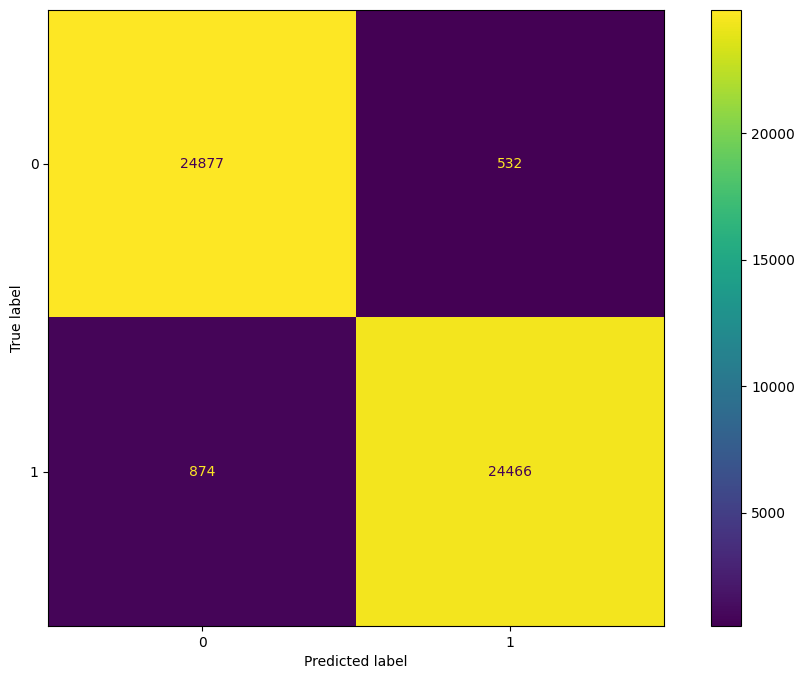

In [47]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

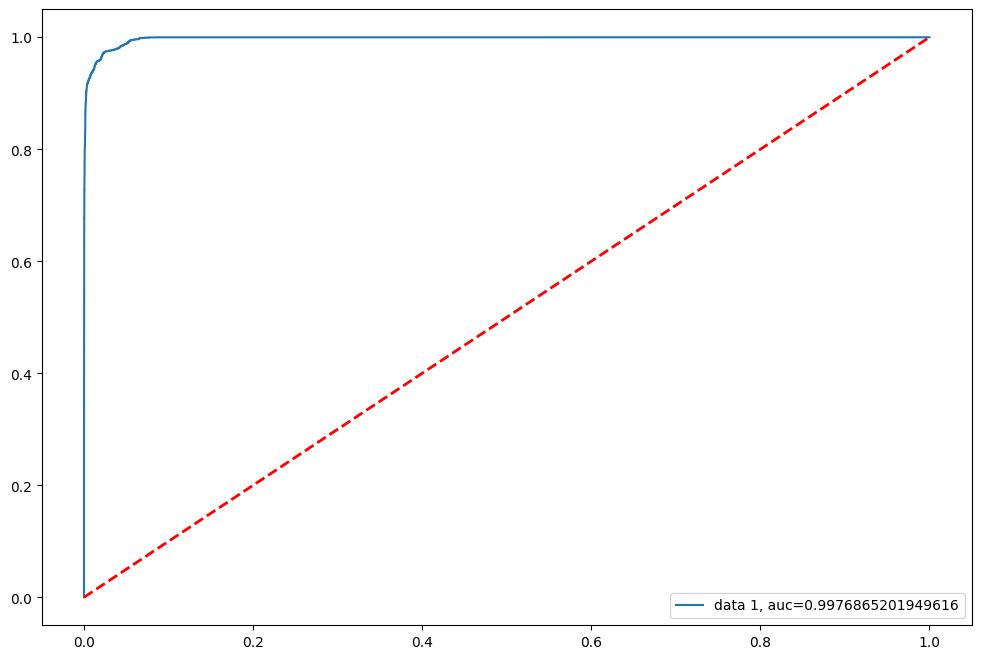

In [48]:
y_pred_proba = rf.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [49]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
-----Resultados-----
Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall 0.9623125493291239
F1 0.9428709521507975
DecisionTreeClassifier
-----Resultados-----
Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall 0.9839779005524862
F1 0.9604221635883906
RandomForestClassifier
-----Resultados-----
Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall 0.9655090765588004
F1 0.9720688148118718


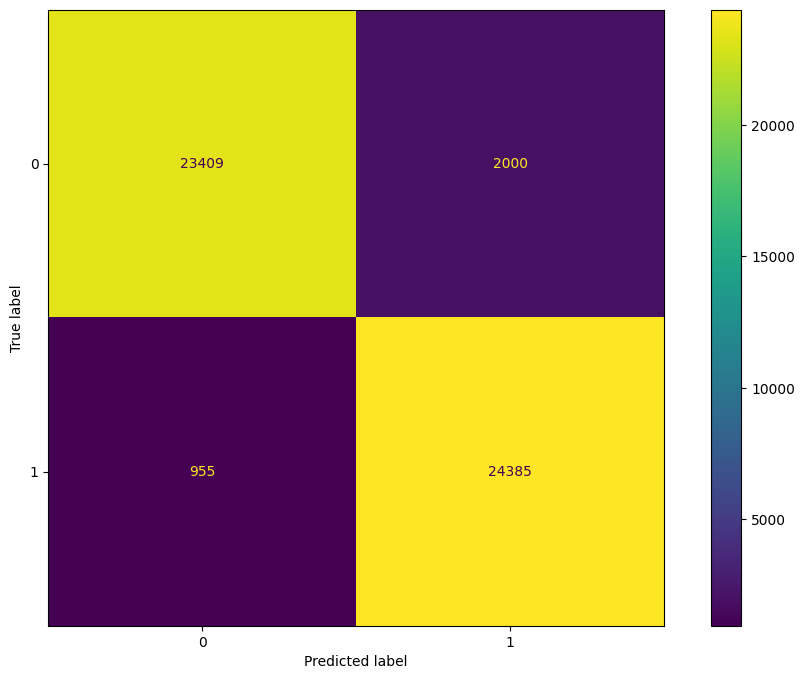

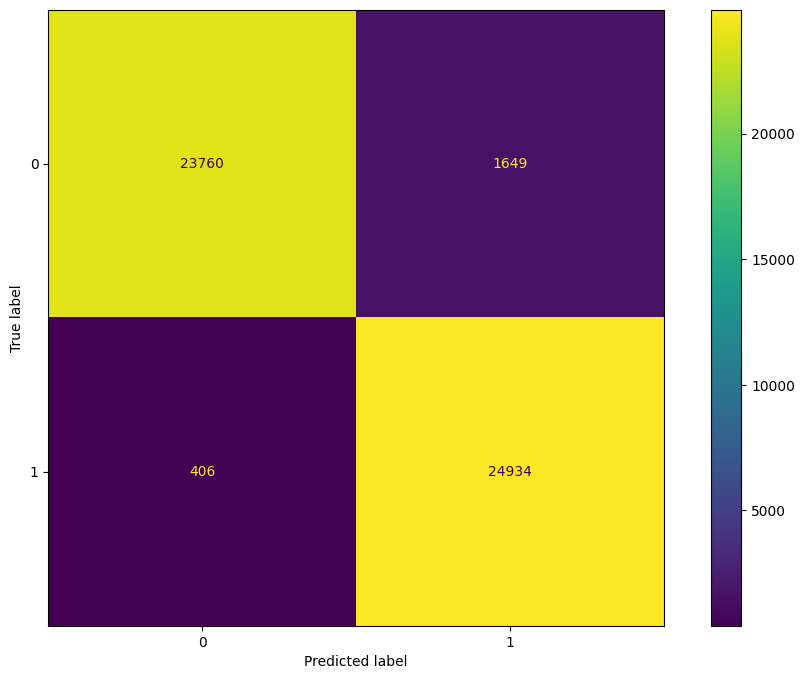

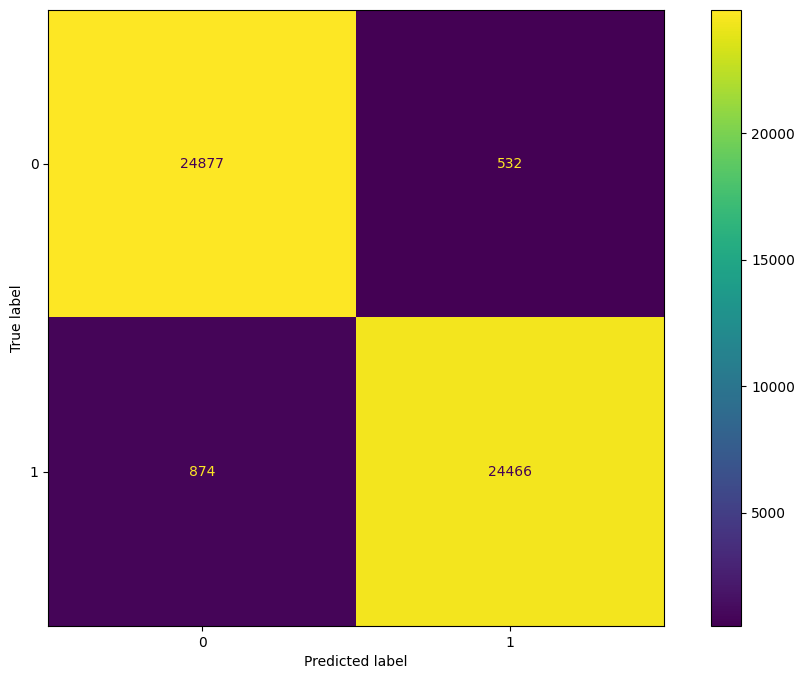

In [51]:
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('-----Resultados-----')
    y_pred = clf.predict(X_test)
    print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
    print('Precisão:',metrics.precision_score(y_test,y_pred))
    print('Recall',metrics.recall_score(y_test,y_pred))
    print('F1',metrics.f1_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    

In [54]:
n_estimators = np.arange(20,200,step=20)
criterion = ["gini", "entropy"]
max_features = ["auto","sqrt","log2"]
max_depth = list(np.arange(2,10,step=1))
min_samples_split = np.arange(2,10,step=2)
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

In [55]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [58]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter = 5, cv = 3, scoring = 'recall', n_jobs = -1, random_state = SEED
)

In [59]:
rcv = random_cv.fit(X,y)

c:\Users\lucca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\lucca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

In [60]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037280,0.005513,0.000000,0.000000,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,4
1,0.037093,0.001083,0.000000,0.000000,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,4
2,11.142149,0.509176,0.210496,0.011768,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.981379,0.999823,0.972245,0.984482,0.011470,2
3,20.611285,1.067420,0.351371,0.028720,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.992374,0.999438,0.988502,0.993438,0.004528,1
4,14.480762,0.076042,0.499976,0.011797,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.929182,0.928913,0.924106,0.006989,3


In [61]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [62]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

model = rfn.fit(X_train,y_train)
y_pred = rfn.predict(X_test)
print('Acurácia:',metrics.accuracy_score(y_test,y_pred))
print('Precisão:',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))
print('F1',metrics.f1_score(y_test,y_pred))

Acurácia: 0.9910540109164713
Precisão: 0.9911193558572782
Recall 0.9909629044988161
F1 0.9910411240034731


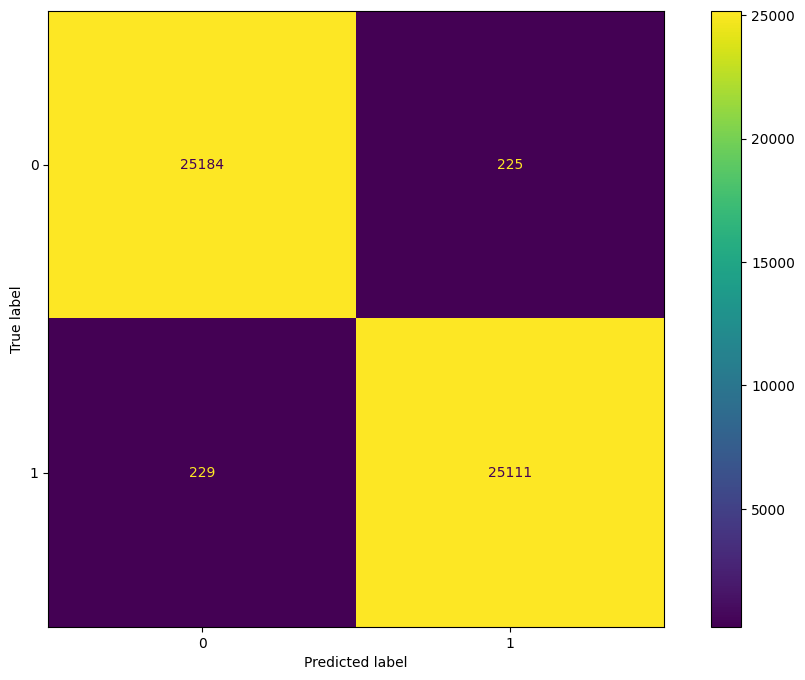

In [63]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()